In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('salary_data_cleaned.csv')

In [3]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,avg_salary,company_txt,job_state,same_state,age,python_yn,R_yn,spark,aws,excel
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\r\nLocation: Albuquerque, NM\r\...",3.8,Tecolote Research\r\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,72.0,Tecolote Research\r\n,NM,0,47,1,0,0,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\r\n\r\nI. General Summary\r\...,3.4,University of Maryland Medical System\r\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,87.5,University of Maryland Medical System\r\n,MD,0,36,1,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\r\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,85.0,KnowBe4\r\n,FL,1,10,1,0,1,0,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\r\nJob ID: 310709\r...,3.8,PNNL\r\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,76.5,PNNL\r\n,WA,1,55,1,0,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\r\nAffinity Solutions / Marketi...,2.9,Affinity Solutions\r\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,114.5,Affinity Solutions\r\n,NY,1,22,1,0,0,0,1


In [4]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel'],
      dtype='object')

In [5]:
def title_simplifier(title):
    if 'Data Scientist' in title:
        return 'Data Scientist'
    elif 'Data Engineer' in title:
        return 'Data Engineer'
    elif 'Analyst' in title:
        return 'Analyst'
    elif 'Machine Learning' in title:
        return 'MLE'
    elif 'Manager' in title:
        return 'Manager'
    elif 'Director' in title:
        return 'Director'
    else:
        return 'na'
    
def seniority(title):
    if 'Sr' in title or 'Senior' in title or 'Sr.' in title or 'Lead' in title or 'Principal' in title:
            return 'Senior'
    elif 'Jr' in title.lower() or 'Jr.' in title.lower():
        return 'Jr'
    else:
        return 'NA'

In [6]:
## Job title and seniority
df['job_simp'] = df['Job Title'].apply(title_simplifier)

In [7]:
df['seniority'] = df['Job Title'].apply(seniority)

In [8]:
df.job_simp.value_counts()

Data Scientist    279
na                184
Data Engineer     119
Analyst           102
MLE                22
Manager            22
Director           14
Name: job_simp, dtype: int64

In [9]:
df.seniority.value_counts()

NA        526
Senior    216
Name: seniority, dtype: int64

In [10]:
##  Fix state Los Angeles 
df['job_state'] = df.job_state.apply(lambda x: x.strip() if x.strip().lower() != 'los angeles' else 'CA')
df.job_state.value_counts()

CA    152
MA    103
NY     72
VA     41
IL     40
MD     35
PA     33
TX     28
WA     21
NC     21
NJ     17
FL     16
OH     14
TN     13
CO     11
DC     11
UT     10
WI     10
IN     10
MO      9
AZ      9
AL      8
KY      6
GA      6
DE      6
MI      6
CT      5
IA      5
NE      4
OR      4
LA      4
KS      3
NM      3
MN      2
ID      2
SC      1
RI      1
Name: job_state, dtype: int64

In [11]:
##  Job description length

df['desc_len'] = df['Job Description'].apply(lambda x : len(x))
df['desc_len']

0      2555
1      4828
2      3495
3      3926
4      2748
       ... 
737    6219
738    6167
739    3107
740    1678
741    3710
Name: desc_len, Length: 742, dtype: int64

In [12]:
##  Competitor count
df['comp_num'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)

In [13]:
df.comp_num

0      0
1      0
2      0
3      3
4      3
      ..
737    3
738    3
739    0
740    0
741    0
Name: comp_num, Length: 742, dtype: int64

In [14]:
## hourly wage to annual 
df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly == 1 else x.min_salary, axis = 1)
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly == 1 else x.max_salary, axis = 1)

In [15]:
df[df['hourly'] == 1][['hourly', 'min_salary', 'max_salary']]

,hourly,min_salary,max_salary
165,1,34,48
177,1,42,68
197,1,36,50
202,1,42,68
210,1,30,50
246,1,34,48
271,1,42,68
337,1,36,50
345,1,48,78
357,1,42,68


In [16]:
#remove new line from job title
df.company_txt = df.company_txt.apply(lambda x: x.replace("\r","").replace("\n",""))

In [17]:
df.company_txt

0                          Tecolote Research
1      University of Maryland Medical System
2                                    KnowBe4
3                                       PNNL
4                         Affinity Solutions
                       ...                  
737                                      GSK
738                               Eventbrite
739           Software Engineering Institute
740                             Numeric, LLC
741             Riverside Research Institute
Name: company_txt, Length: 742, dtype: object

In [18]:
df.describe()

,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,same_state,age,python_yn,R_yn,spark,aws,excel,desc_len,comp_num
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,100.626011,0.557951,46.591644,0.528302,0.002695,0.225067,0.237197,0.522911,3910.172507,1.053908
std,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,38.855948,0.496965,53.778815,0.499535,0.051882,0.417908,0.425651,0.499812,1533.827777,1.384239
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2834.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,24.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3781.500000,0.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,59.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4772.000000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,276.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10146.000000,4.000000


df.columns

In [19]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority', 'desc_len',
       'comp_num'],
      dtype='object')

<AxesSubplot:>

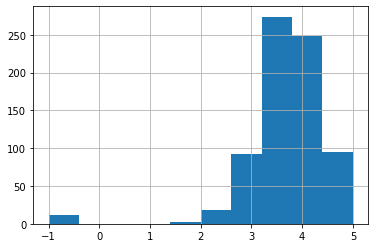

In [20]:
df.Rating.hist()

<AxesSubplot:>

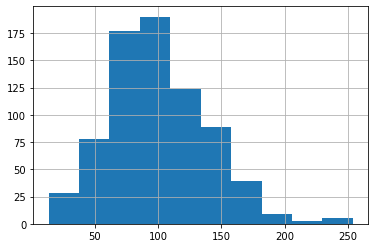

In [21]:
df.avg_salary.hist()

<AxesSubplot:>

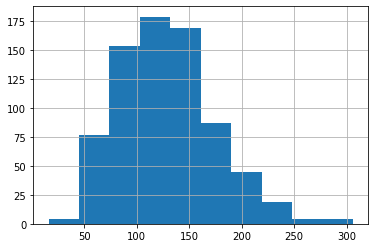

In [22]:
df.max_salary.hist()

<AxesSubplot:>

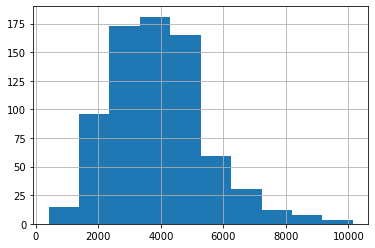

In [23]:
df.desc_len.hist()

<AxesSubplot:>

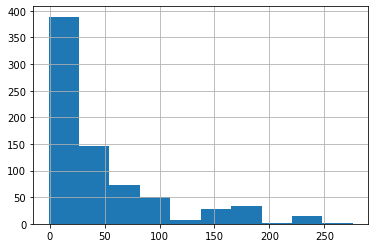

In [24]:
df.age.hist()

<AxesSubplot:>

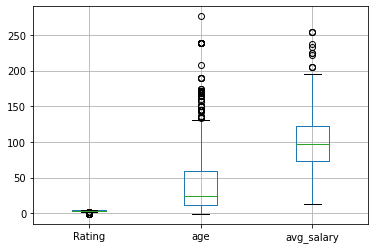

In [25]:
df.boxplot(column = ['Rating', 'age', 'avg_salary'])

In [26]:
df[['Rating', 'age', 'avg_salary', 'desc_len']].corr()

,Rating,age,avg_salary,desc_len
Rating,1.000000,0.021655,0.013492,-0.012631
age,0.021655,1.000000,0.019655,0.165090
avg_salary,0.013492,0.019655,1.000000,0.078093
desc_len,-0.012631,0.165090,0.078093,1.000000


<AxesSubplot:>

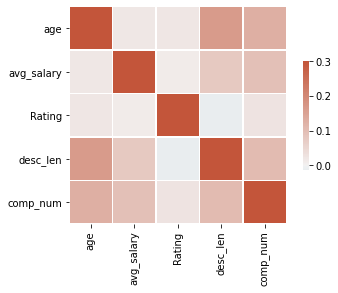

In [27]:
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df[['age', 'avg_salary', 'Rating', 'desc_len', 'comp_num']].corr(), cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [28]:
df_cat = df[['Location', 'Headquarters', 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue', 'company_txt', 'job_state','same_state', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority']]

graph for Location: total = 200


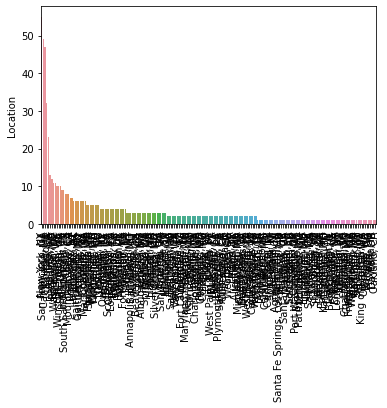

graph for Headquarters: total = 198


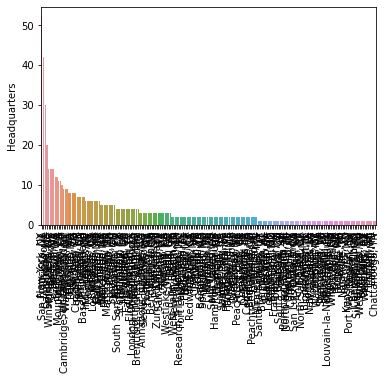

graph for Size: total = 9


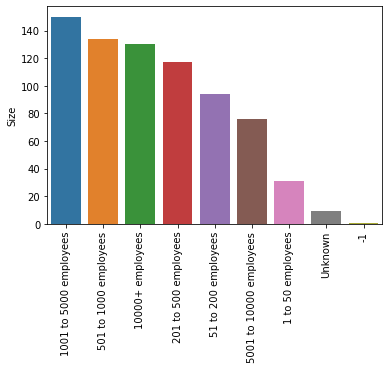

graph for Type of ownership: total = 11


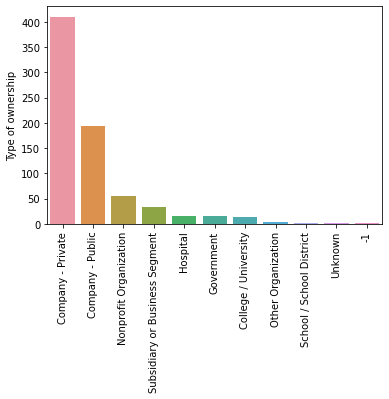

graph for Industry: total = 60


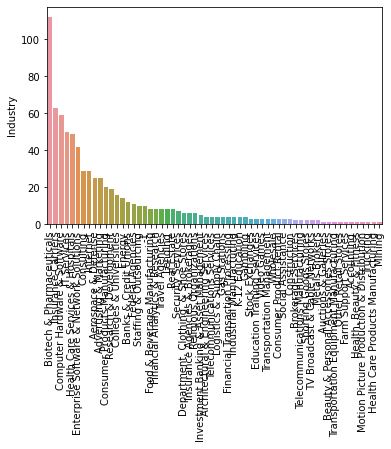

graph for Sector: total = 25


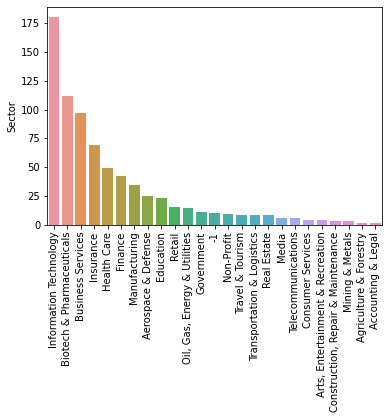

graph for Revenue: total = 14


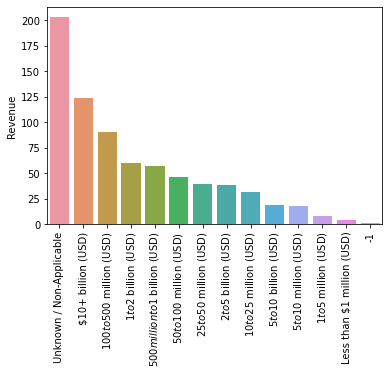

graph for company_txt: total = 343


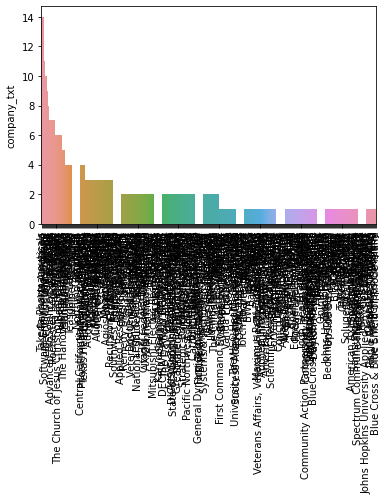

graph for job_state: total = 37


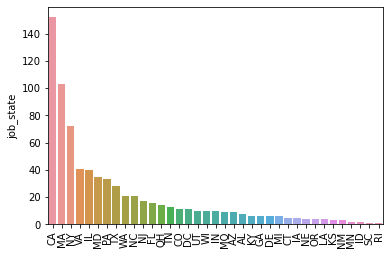

graph for same_state: total = 2


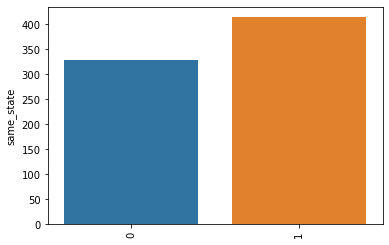

graph for python_yn: total = 2


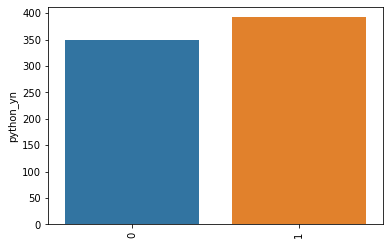

graph for R_yn: total = 2


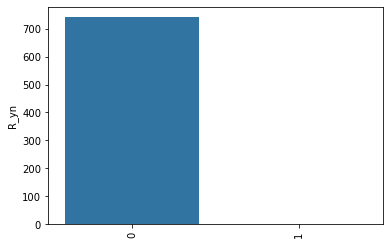

graph for spark: total = 2


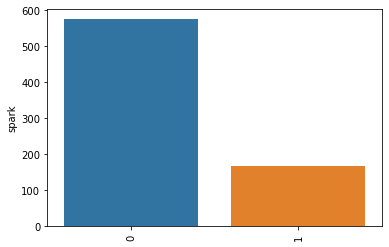

graph for aws: total = 2


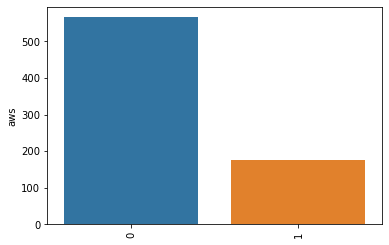

graph for excel: total = 2


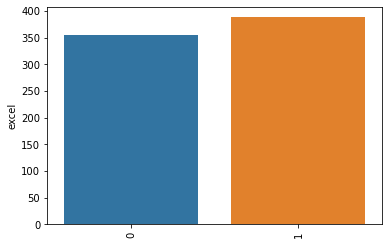

graph for job_simp: total = 7


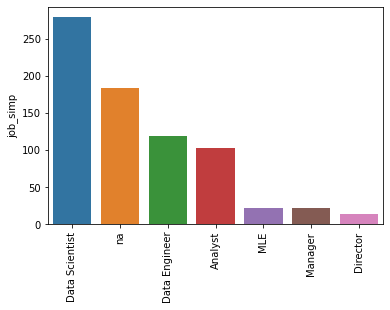

graph for seniority: total = 2


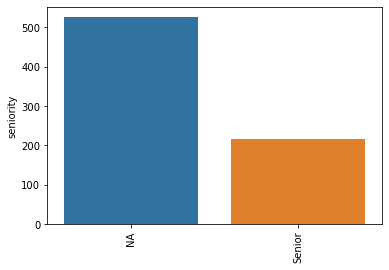

In [29]:

for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

graph for Location: total = 20


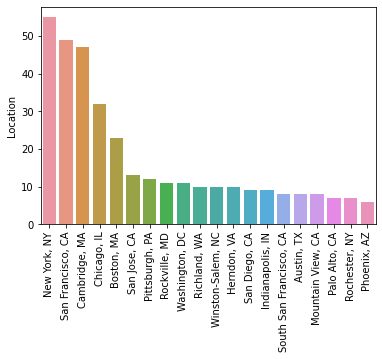

graph for Headquarters: total = 20


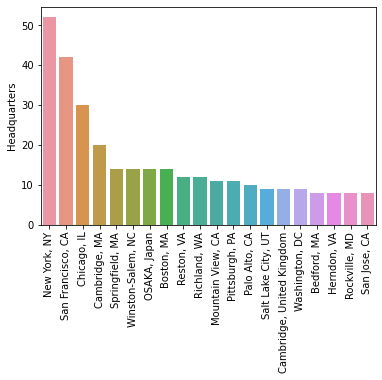

graph for company_txt: total = 20


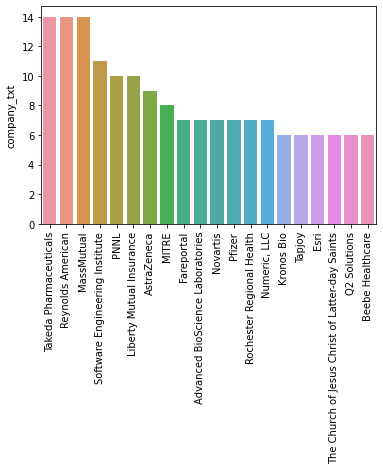

In [30]:
for i in df_cat[['Location','Headquarters','company_txt']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [31]:
df_cat['Sector'].value_counts().index

Index(['Information Technology', 'Biotech & Pharmaceuticals',
       'Business Services', 'Insurance', 'Health Care', 'Finance',
       'Manufacturing', 'Aerospace & Defense', 'Education', 'Retail',
       'Oil, Gas, Energy & Utilities', 'Government', '-1', 'Non-Profit',
       'Travel & Tourism', 'Transportation & Logistics', 'Real Estate',
       'Media', 'Telecommunications', 'Consumer Services',
       'Arts, Entertainment & Recreation',
       'Construction, Repair & Maintenance', 'Mining & Metals',
       'Agriculture & Forestry', 'Accounting & Legal'],
      dtype='object')

In [32]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority', 'desc_len',
       'comp_num'],
      dtype='object')

In [33]:
pd.pivot_table(df, index = ['job_simp', 'seniority'], values = 'avg_salary')

avg_salary
job_simp       seniority            
Analyst        NA          61.093333
               Senior      79.092593
Data Engineer  NA          96.701220
               Senior     124.689189
Data Scientist NA         107.092593
               Senior     139.555556
Director       NA         168.607143
MLE            NA         119.133333
               Senior     142.071429
Manager        NA          84.022727
na             NA          73.949612
               Senior     110.427273

In [34]:
pd.pivot_table(df, index = 'job_state', values = 'avg_salary')

,avg_salary
job_state,
AL,57.937500
AZ,85.666667
CA,123.513158
CO,77.045455
CT,71.100000
DC,110.181818
DE,27.500000
FL,77.625000
GA,80.666667


In [35]:
pd.pivot_table(df, index = 'job_state', values = 'avg_salary').sort_values('avg_salary')

,avg_salary
job_state,
DE,27.500000
NE,41.000000
LA,52.250000
ID,56.250000
AL,57.937500
SC,60.500000
CT,71.100000
WI,73.300000
NM,74.333333


In [36]:
pd.pivot_table(df, index = 'job_state', values = 'avg_salary').sort_values('avg_salary', ascending = False)

,avg_salary
job_state,
CA,123.513158
IL,116.662500
DC,110.181818
MA,106.281553
NJ,104.558824
MI,100.250000
RI,100.000000
NY,98.652778
NC,98.452381


In [37]:
pd.set_option('display.max_rows', None)
pd.pivot_table(df, index = ['job_state', 'job_simp'], values = 'avg_salary').sort_values('job_state')

avg_salary
job_state job_simp                  
AL        Analyst          62.200000
          Data Engineer    65.000000
          na               43.750000
AZ        Analyst          55.000000
          Data Engineer    79.500000
          Data Scientist   69.500000
          na              124.500000
CA        Manager          80.611111
          MLE             177.300000
          na               99.907407
          Data Engineer   129.540000
          Analyst          85.250000
          Data Scientist  142.522059
CO        Analyst          29.500000
          Data Engineer    99.000000
          Data Scientist  108.666667
          MLE             100.500000
          na               31.500000
CT        Data Scientist   84.000000
          na               62.500000
DC        Analyst          63.500000
          Data Engineer    85.000000
          Data Scientist  149.000000
DE        na               27.500000
FL        Data Engineer    91.833333
          Data Scientist   97.357143
          Analyst          47.500000
GA        Data Scientist   81.333333
          na               80.000000
IA        Analyst          43.000000
          Data Engineer   102.833333
ID        Analyst          56.250000
IL        na               57.166667
          Analyst          66.500000
          Data Engineer    96.125000
          Data Scientist  117.233333
          Director        221.750000
          MLE             133.000000
IN        na               69.000000
          Data Scientist   84.500000
          Data Engineer   114.500000
KS        MLE              87.000000
KY        Data Scientist   84.000000
          na              103.500000
LA        Analyst          48.000000
          Data Engineer    70.500000
          na               20.000000
MA        Manager          71.900000
          Director        117.833333
          na              107.478261
          Data Engineer   107.291667
          Analyst          59.125000
          Data Scientist  113.750000
MD        Data Scientist  109.115385
          na               88.750000
          Analyst          80.666667
          Data Engineer   109.000000
MI        Data Scientist  106.625000
          Manager          87.500000
MN        Analyst          76.000000
          Data Engineer    95.000000
MO        Analyst          61.000000
          Data Scientist  127.666667
          Manager          40.500000
          na               72.333333
NC        Data Engineer   104.250000
          Data Scientist  117.000000
          na               90.916667
NE        na               41.000000
NJ        na               82.500000
          Manager         109.500000
          Director        161.500000
          Data Engineer   112.000000
          Data Scientist  106.875000
          Analyst          83.583333
NM        Data Scientist   74.333333
NY        Analyst          65.607143
          Data Engineer    86.375000
          Data Scientist  115.250000
          MLE             125.000000
          na               81.583333
OH        na               91.166667
          Analyst          53.875000
          Data Scientist  105.285714
OR        Data Scientist   98.500000
          Data Engineer    73.000000
PA        Analyst          62.750000
          Data Engineer    91.500000
          Data Scientist  113.333333
          MLE             120.500000
          Manager         109.666667
          na               76.062500
RI        Analyst         100.000000
SC        na               60.500000
TN        Analyst          13.500000
          Data Engineer   100.950000
          Data Scientist   96.000000
TX        Data Scientist  100.730769
          na               41.285714
          Data Engineer   113.062500
UT        Analyst          54.750000
          Data Engineer   100.333333
          Data Scientist  140.500000
VA        Analyst          71.583333
          Data Engineer    96.900000
          Data Scientist  108.416667
          MLE              87.

In [38]:
pd.set_option('display.max_rows', None)
pd.pivot_table(df, index = ['job_state', 'job_simp'], values = 'avg_salary', aggfunc = 'count').sort_values('job_state')

avg_salary
job_state job_simp                  
AL        Analyst                  5
          Data Engineer            1
          na                       2
AZ        Analyst                  1
          Data Engineer            5
          Data Scientist           1
          na                       2
CA        Manager                  9
          MLE                      5
          na                      27
          Data Engineer           25
          Analyst                 18
          Data Scientist          68
CO        Analyst                  1
          Data Engineer            3
          Data Scientist           3
          MLE                      1
          na                       3
CT        Data Scientist           2
          na                       3
DC        Analyst                  2
          Data Engineer            4
          Data Scientist           5
DE        na                       6
FL        Data Engineer            3
          Data Scientist           7
          Analyst                  6
GA        Data Scientist           3
          na                       3
IA        Analyst                  2
          Data Engineer            3
ID        Analyst                  2
IL        na                       6
          Analyst                  3
          Data Engineer            8
          Data Scientist          15
          Director                 6
          MLE                      2
IN        na                       4
          Data Scientist           2
          Data Engineer            4
KS        MLE                      3
KY        Data Scientist           2
          na                       4
LA        Analyst                  1
          Data Engineer            2
          na                       1
MA        Manager                  5
          Director                 6
          na                      46
          Data Engineer           12
          Analyst                  4
          Data Scientist          30
MD        Data Scientist          13
          na                      16
          Analyst                  3
          Data Engineer            3
MI        Data Scientist           4
          Manager                  2
MN        Analyst                  1
          Data Engineer            1
MO        Analyst                  2
          Data Scientist           3
          Manager                  1
          na                       3
NC        Data Engineer            6
          Data Scientist           3
          na                      12
NE        na                       4
NJ        na                       1
          Manager                  2
          Director                 2
          Data Engineer            2
          Data Scientist           4
          Analyst                  6
NM        Data Scientist           3
NY        Analyst                 14
          Data Engineer            4
          Data Scientist          40
          MLE                      2
          na                      12
OH        na                       3
          Analyst                  4
          Data Scientist           7
OR        Data Scientist           3
          Data Engineer            1
PA        Analyst                  8
          Data Engineer            1
          Data Scientist           6
          MLE                      7
          Manager                  3
          na                       8
RI        Analyst                  1
SC        na                       1
TN        Analyst                  2
          Data Engineer           10
          Data Scientist           1
TX        Data Scientist          13
          na                       7
          Data Engineer            8
UT        Analyst                  4
          Data Engineer            3
          Data Scientist           3
VA        Analyst                  6
          Data Engineer           10
          Data Scientist          18
          MLE                 

In [39]:
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'comp_num', 'hourly', 'employer_provided', 'python_yn', 'R_yn', 'spark', 'aws', 'excel', 'Type of ownership','avg_salary']]

In [40]:
for i in df_pivots:
    print()
    if i != 'avg_salary':
        print(pd.pivot_table(df_pivots, index = i, values = 'avg_salary').sort_values('avg_salary', ascending = False))


        avg_salary
Rating            
-1.0    136.181818
 5.0    134.700000
 2.5    120.000000
 4.5    117.714286
 4.1    116.368421
 3.9    113.071429
 2.6    109.083333
 4.4    108.606061
 3.2    105.500000
 4.0    105.340426
 3.5    104.897959
 3.7    104.131148
 4.7    103.983871
 4.3    102.468750
 3.3    101.858974
 4.2    100.442308
 2.2     97.750000
 4.6     97.250000
 3.8     96.811475
 2.1     95.900000
 3.4     93.011364
 1.9     87.500000
 3.1     86.580000
 3.0     85.588235
 3.6     85.467391
 2.8     83.928571
 2.7     83.250000
 2.3     81.500000
 2.9     81.138889
 4.8     80.277778
 2.4     60.214286

                                          avg_salary
Industry                                            
Other Retail Stores                       163.500000
Motion Picture Production & Distribution  146.000000
Financial Analytics & Research            145.125000
Health, Beauty, & Fitness                 139.500000
Telecommunications Services               131.500000


In [41]:
pd.pivot_table(df, index = 'Revenue', columns = 'python_yn', values = 'avg_salary')

python_yn,0,1
Revenue,,
$1 to $2 billion (USD),80.093750,113.420455
$1 to $5 million (USD),102.000000,121.785714
$10 to $25 million (USD),80.875000,119.843750
$10+ billion (USD),102.393939,129.698276
$100 to $500 million (USD),67.319149,100.068182
$2 to $5 billion (USD),79.000000,106.886364
$25 to $50 million (USD),79.166667,88.343750
$5 to $10 billion (USD),74.888889,111.550000
$5 to $10 million (USD),112.111111,140.111111


In [42]:
pd.pivot_table(df, index = 'Revenue', columns = 'python_yn', values = 'avg_salary', aggfunc = 'count')

python_yn,0,1
Revenue,,
$1 to $2 billion (USD),16.0,44.0
$1 to $5 million (USD),1.0,7.0
$10 to $25 million (USD),16.0,16.0
$10+ billion (USD),66.0,58.0
$100 to $500 million (USD),47.0,44.0
$2 to $5 billion (USD),17.0,22.0
$25 to $50 million (USD),24.0,16.0
$5 to $10 billion (USD),9.0,10.0
$5 to $10 million (USD),9.0,9.0


In [ ]:
import nltk
nltk.download('punkt')

In [ ]:
import nltk

nltk.download('stopwords')

In [52]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

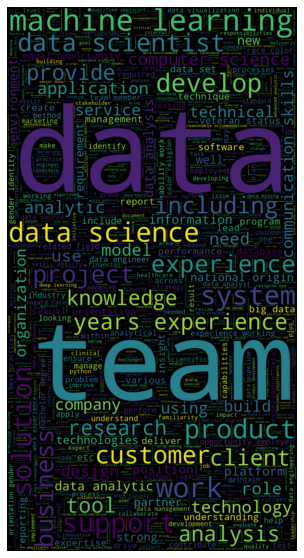

In [54]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="black", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()